In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [3]:
df = df[df['Season'] == 'Summer']

## Medal Analysis

In [4]:
df = df.merge(region_df, on='NOC', how='left')

In [5]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [8]:
dfs=pd.get_dummies(df['Medal'])

In [9]:
df.shape


(221167, 17)

In [10]:
df=pd.concat([df,dfs],axis=1)

In [11]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

NOC    Gold  Silver  Bronze
0    USA  2472.0  1333.0  1197.0
1    URS   832.0   635.0   596.0
2    GBR   635.0   729.0   620.0
3    GER   592.0   538.0   649.0
4    ITA   518.0   474.0   454.0
..   ...     ...     ...     ...
225  AHO     0.0     1.0     0.0
226  LBR     0.0     0.0     0.0
227  LCA     0.0     0.0     0.0
228  LES     0.0     0.0     0.0
229  LBA     0.0     0.0     0.0

[230 rows x 4 columns]

In [12]:
df[(df['NOC']=='IND') & (df['Medal']=='Gold')]

ID                    Name Sex   Age  Height  Weight   Team  NOC  \
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN       0     1       0  
4190    Gold  India   NaN       0     1       0  
4460    Gold  India   NaN       0     1       0  
4461    Gold  India   NaN       0     1       0  
4462    Gold  India   NaN       0     1       0  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN       0     1       0  
193964  Gold  India   NaN       0     1       0  
193965  Gold  India   NaN       0     1       0  
205949  Gold  India   NaN       0     1       0  
219336  Gold  India   NaN       0     1       0  

[131 rows x 20 columns]

In [13]:
medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [14]:
medal_tally=medal_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [15]:
medal_tally['Total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [16]:
medal_tally['Gold']=medal_tally['Gold'].astype('int')

In [17]:
years=medal_df['Year'].unique().tolist()

In [18]:
years.sort()

In [19]:
years.insert(0,'Overall')

In [20]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [21]:
country=medal_df['region'].unique().tolist()

In [22]:
medal_tally['region'].dropna()

0                USA
1             Russia
2            Germany
3                 UK
4             France
           ...      
200          Lesotho
201          Albania
202            Libya
203    Liechtenstein
204          Liberia
Name: region, Length: 205, dtype: object

In [23]:
country=np.unique(df['region'].dropna().values.tolist())

In [24]:
country.sort()

In [25]:
country

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Boliva', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam'

In [26]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',
                                                                                      ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    print(x)

fetch_medal_tally(medal_df,year='Overall',country='India')

# Overall Analysis

##### . No of Editions
##### .No of Cities
##### .No of event/Sports
##### .No of atheletes
##### .Participating Nations

In [27]:
df['Year'].unique().shape[0]-1


28

In [28]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [29]:
df['Sport'].unique().shape[0]

52

In [30]:
df['Event'].unique().shape[0]

651

In [31]:
df['Name'].unique().shape[0]

116122

In [32]:
df['region'].unique().shape[0]

206

In [33]:
#Participating Nations over time 
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [34]:
nation=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [35]:
nation.rename(columns={'index':'Editions','Year':'No of Country'},inplace=True)

In [36]:
import  plotly.express as px

In [37]:
fig =px.line(nation ,x='Editions',y='No of Country')
fig.show()

In [38]:
nation=df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')

In [39]:
nation

index  Year
28   1896    43
26   1900    90
25   1904    95
27   1906    74
23   1908   109
24   1912   107
14   1920   158
21   1924   131
22   1928   122
20   1932   131
17   1936   150
15   1948   153
19   1952   149
16   1956   151
18   1960   150
13   1964   163
12   1968   172
11   1972   193
10   1976   198
9    1980   203
8    1984   221
7    1988   237
6    1992   257
5    1996   271
4    2000   300
3    2004   301
2    2008   302
1    2012   302
0    2016   306

In [40]:
x=df.drop_duplicates(['Year','region','Event'])


<AxesSubplot:xlabel='Year', ylabel='Sport'>

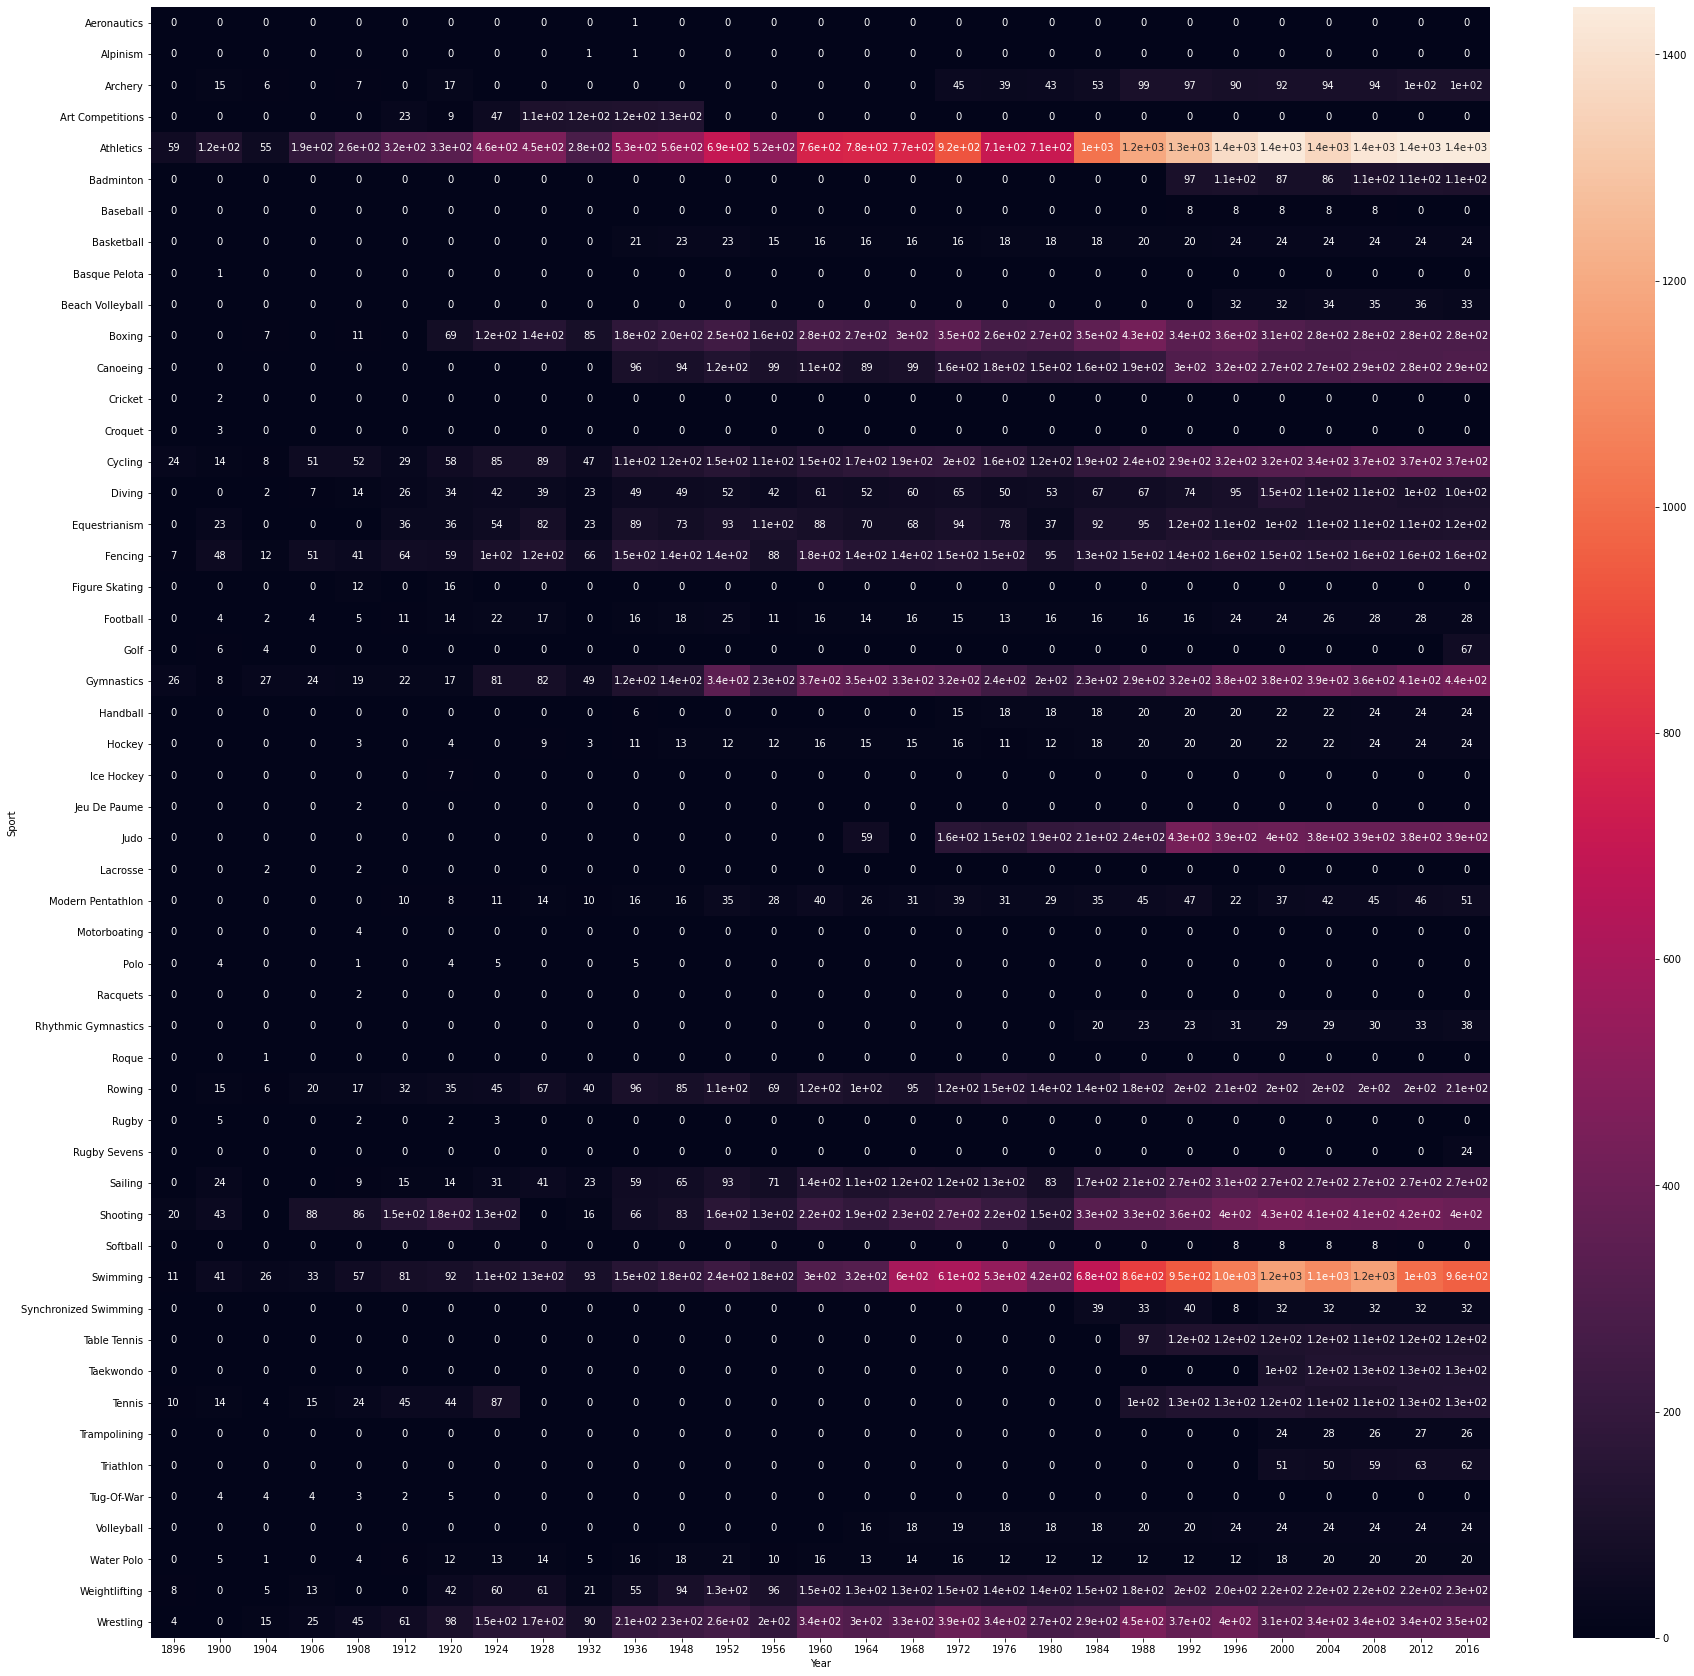

In [41]:
plt.figure(figsize=(30,30))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'), annot=True)


In [42]:
 temp_df = df.dropna(subset=['Medal'])

In [43]:
 x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')

In [44]:
x

index  Name_x       Sport  \
0                            Michael Fred Phelps, II      28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
49                      Nikolay Yefimovich Andrianov      15  Gymnastics   
73                       Borys Anfiyanovych Shakhlin      13  Gymnastics   
97                                       Takashi Ono      13  Gymnastics   
130                              Edoardo Mangiarotti      13     Fencing   
144             Dara Grace Torres (-Hoffman, -Minas)      12    Swimming   
157                    Natalie Anne Coughlin (-Hall)      12    Swimming   
169                                       Sawao Kato      12  Gymnastics   
193                          Aleksey Yuryevich Nemov      12  Gymnastics   
214                           Birgit Fischer-Schmidt      12    Canoeing   
227  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
244                             Paavo Johannes Nurmi      12   Athletics   
256                               Ryan Steven Lochte      12    Swimming   
270                                Mark Andrew Spitz      11    Swimming   

      region  
0        USA  
30    Russia  
49    Russia  
73    Russia  
97     Japan  
130    Italy  
144      USA  
157      USA  
169    Japan  
193   Russia  
214  Germany  
227      USA  
244  Finland  
256      USA  
270      USA

In [45]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    print(x)

In [46]:
most_successful(df,"Overall")

                                                Name  Medals       Sport  \
0                            Michael Fred Phelps, II      28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
49                      Nikolay Yefimovich Andrianov      15  Gymnastics   
73                       Borys Anfiyanovych Shakhlin      13  Gymnastics   
97                                       Takashi Ono      13  Gymnastics   
130                              Edoardo Mangiarotti      13     Fencing   
144             Dara Grace Torres (-Hoffman, -Minas)      12    Swimming   
157                    Natalie Anne Coughlin (-Hall)      12    Swimming   
169                                       Sawao Kato      12  Gymnastics   
193                          Aleksey Yuryevich Nemov      12  Gymnastics   
214                           Birgit Fischer-Schmidt      12    Canoeing   
227  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
244         

In [47]:
sport_list = df['Sport'].unique().tolist()
sport_list

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

In [48]:
 sport_list.sort()

In [49]:
 sport_list.insert(0,'Overall')

In [50]:
sport_list

['Overall',
 'Aeronautics',
 'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Boxing',
 'Canoeing',
 'Cricket',
 'Croquet',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Jeu De Paume',
 'Judo',
 'Lacrosse',
 'Modern Pentathlon',
 'Motorboating',
 'Polo',
 'Racquets',
 'Rhythmic Gymnastics',
 'Roque',
 'Rowing',
 'Rugby',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Tug-Of-War',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling']

# Country Wise Analyasis 
    MEDAL
    HEATMAP
    MOST SUCCESSFUL ANALYSIS(Top 10)

In [51]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

<ipython-input-51-afcc77004aa1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
new_df = temp_df[temp_df['region'] == 'India']
new_df

ID                                Name Sex   Age  Height  Weight  \
4186      2699                         Shaukat Ali   M  30.0     NaN     NaN   
4190      2703                    Syed Mushtaq Ali   M  22.0   165.0    61.0   
4461      2864                 Richard James Allen   M  30.0   172.0     NaN   
4462      2864                 Richard James Allen   M  34.0   172.0     NaN   
7056      4518          Joseph Anthony "Joe" Antic   M  29.0   168.0    59.0   
17790    11197                 Vasudevan Bhaskaran   M  29.0   174.0    68.0   
18286    11520         Govinda Billimogaputtaswamy   M  20.0   171.0    60.0   
18444    11601                      Abhinav Bindra   M  25.0   173.0    70.0   
34630    21339            Rajendra Absolem Christy   M  30.0   165.0    58.0   
35545    21912              Leslie Walter Claudius   M  21.0   162.0    53.0   
35546    21912              Leslie Walter Claudius   M  25.0   162.0    53.0   
35547    21912              Leslie Walter Claudius   M  29.0   162.0    53.0   
50700    30913                      Yogeshwar Dutt   M  29.0   168.0    65.0   
87030    53275          Khashaba Dadasaheb  Jahdav   M  25.0     NaN     NaN   
101447   62303        Mangte Chungneijang Mary Kom   F  29.0   158.0    51.0   
105780   64909                Sushil Kumar Solanki   M  25.0   166.0    66.0   
105781   64909                Sushil Kumar Solanki   M  29.0   166.0    66.0   
105783   64910                         Vijay Kumar   M  26.0   170.0    70.0   
121136   74069                        Sakshi Malik   F  23.0   162.0    58.0   
121193   74119                   Karnam Malleswari   F  25.0   163.0    60.0   
138564   84516                        Gagan Narang   M  29.0   180.0   115.0   
139531   85112                        Saina Nehwal   F  22.0   167.0    65.0   
148278   90518                 Leander Adrian Paes   M  23.0   178.0    77.0   
159205   97066  Norman Gilbert Pritchard (-Trevor)   M  24.0     NaN     NaN   
159207   97066  Norman Gilbert Pritchard (-Trevor)   M  24.0     NaN     NaN   
162491   99103          Rajyavardhan Singh Rathore   M  34.0   188.0    85.0   
181485  110974      Pusarla Venkata "P. V." Sindhu   F  21.0   179.0    65.0   
181769  111161                Vijender Kumar Singh   M  22.0   182.0    75.0   

         Team  NOC        Games  Year  Season            City          Sport  \
4186    India  IND  1928 Summer  1928  Summer       Amsterdam         Hockey   
4190    India  IND  1964 Summer  1964  Summer           Tokyo         Hockey   
4461    India  IND  1932 Summer  1932  Summer     Los Angeles         Hockey   
4462    India  IND  1936 Summer  1936  Summer          Berlin         Hockey   
7056    India  IND  1960 Summer  1960  Summer            Roma         Hockey   
17790   India  IND  1980 Summer  1980  Summer          Moskva         Hockey   
18286   India  IND  1972 Summer  1972  Summer          Munich         Hockey   
18444   India  IND  2008 Summer  2008  Summer         Beijing       Shooting   
34630   India  IND  1968 Summer  1968  Summer     Mexico City         Hockey   
35545   India  IND  1948 Summer  1948  Summer          London         Hockey   
35546   India  IND  1952 Summer  1952  Summer        Helsinki         Hockey   
35547   India  IND  1956 Summer  1956  Summer       Melbourne         Hockey   
50700   India  IND  2012 Summer  2012  Summer          London      Wrestling   
87030   India  IND  1952 Summer  1952  Summer        Helsinki      Wrestling   
101447  India  IND  2012 Summer  2012  Summer          London         Boxing   
105780  India  IND  2008 Summer  2008  Summer         Beijing      Wrestling   
105781  India  IND  2012 Summer  2012  Summer          London      Wrestling   
105783  India  IND  2012 Summer  2012  Summer          London       Shooting   
121136  India  IND  2016 Summer  2016  Summer  Rio de Janeiro      Wrestling   
121193  India  IND  2000 Summer  2000  Summer          Sydney  Weightlifting   
138564  Ind

In [53]:
 final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [54]:
fig =px.line(final_df ,x='Year',y='Medal')
fig.show()

In [55]:
new_df = temp_df[temp_df['region'] == 'India']

<AxesSubplot:xlabel='Year', ylabel='Sport'>

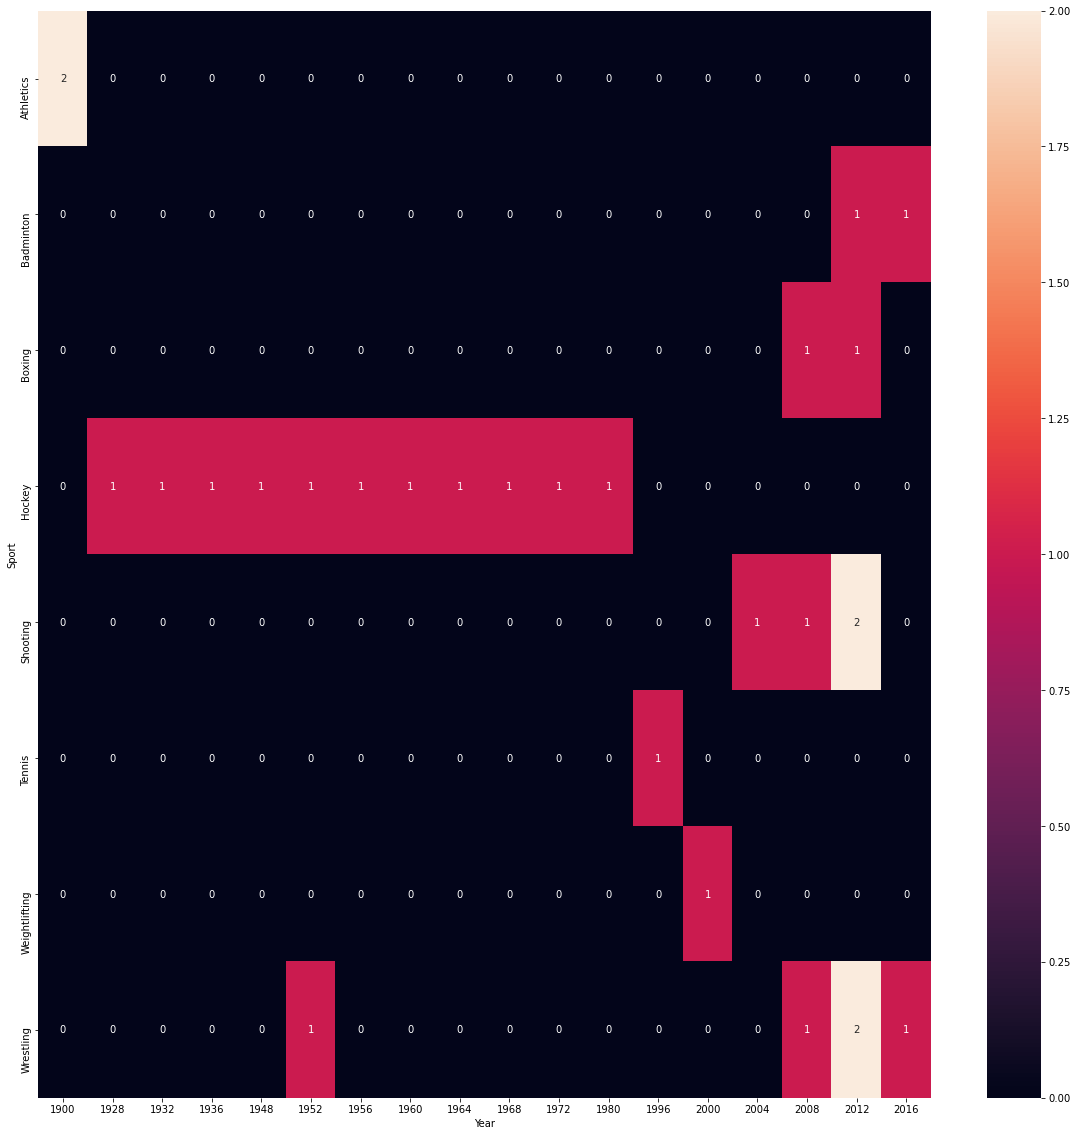

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [57]:
def most_successful_countrywise(df, country):
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == country]

    x = temp_df['Name'].value_counts().reset_index().head(10).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    print(x)

In [58]:
most_successful_countrywise(df,country='USA')

                                                Name  Medals      Sport
0                            Michael Fred Phelps, II      28   Swimming
30                     Natalie Anne Coughlin (-Hall)      12   Swimming
42                                Ryan Steven Lochte      12   Swimming
56              Dara Grace Torres (-Hoffman, -Minas)      12   Swimming
69   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12   Swimming
86                    Matthew Nicholas "Matt" Biondi      11   Swimming
98                              Carl Townsend Osburn      11   Shooting
114                                Mark Andrew Spitz      11   Swimming
126                      Raymond Clarence "Ray" Ewry      10  Athletics
136                             Gary Wayne Hall, Jr.      10   Swimming


# Athlete wise Analysis

In [59]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])
athlete_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222544  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222546  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222544          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222546       Argentina  ARG  2000 Summer  2000  Summer          Sydney   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event   Medal  \
0       Basketball             Basketball Men's Basketball     NaN   
1             Judo            Judo Men's Extra-Lightweight     NaN   
2         Football                 Football Men's Football     NaN   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics            Athletics Women's 100 metres     NaN   
...            ...                                     ...     ...   
222544   Athletics  Athletics Women's 4 x 400 metres Relay  Bronze   
222546      Hockey                     Hockey Men's Hockey     NaN   
222548    Football                 Football Men's Football     NaN   
222549      Rowing  Rowing Men's Lightweight Coxless Fours     NaN   
222551  Basketball           Basketball Women's Basketball     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222544       Russia   NaN       1     0       0  
222546    Argentina   NaN       0     0       0  
222548          USA   NaN       0     0       0  
222549       Russia   NaN       0     0       0  
222551      Belarus   NaN       0     0       0  

[116885 rows x 20 columns]

In [60]:
x1 = athlete_df['Age'].dropna()
x1 

0         24.0
1         23.0
2         24.0
3         34.0
4         18.0
          ... 
222544    19.0
222546    23.0
222548    21.0
222549    24.0
222551    33.0
Name: Age, Length: 110734, dtype: float64

In [61]:
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x2

3         34.0
33        27.0
60        25.0
111       23.0
116       22.0
          ... 
222253    22.0
222334    22.0
222429    19.0
222463    23.0
222526    21.0
Name: Age, Length: 5570, dtype: float64

In [62]:
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [63]:
import plotly.figure_factory as ff

In [64]:
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'],show_hist=False, show_rug=False)
fig.show()

In [65]:
  
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [66]:
x = []
name = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)
   

In [67]:
fig=ff.create_distplot(x,name,show_hist=False, show_rug=False)
fig.show()

In [68]:
x = []
name = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Silver']['Age'].dropna())
    name.append(sport)

In [69]:
fig=ff.create_distplot(x,name,show_hist=False, show_rug=False)
fig.show()

In [72]:
athlete_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222544  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222546  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222544          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222546       Argentina  ARG  2000 Summer  2000  Summer          Sydney   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event   Medal  \
0       Basketball             Basketball Men's Basketball     NaN   
1             Judo            Judo Men's Extra-Lightweight     NaN   
2         Football                 Football Men's Football     NaN   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics            Athletics Women's 100 metres     NaN   
...            ...                                     ...     ...   
222544   Athletics  Athletics Women's 4 x 400 metres Relay  Bronze   
222546      Hockey                     Hockey Men's Hockey     NaN   
222548    Football                 Football Men's Football     NaN   
222549      Rowing  Rowing Men's Lightweight Coxless Fours     NaN   
222551  Basketball           Basketball Women's Basketball     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222544       Russia   NaN       1     0       0  
222546    Argentina   NaN       0     0       0  
222548          USA   NaN       0     0       0  
222549       Russia   NaN       0     0       0  
222551      Belarus   NaN       0     0       0  

[116885 rows x 20 columns]

In [77]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])
athlete_df['Medal'].fillna('No Medal', inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

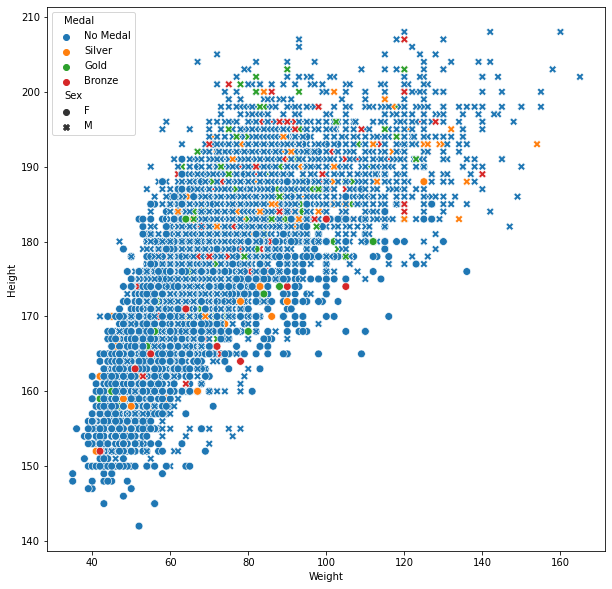

In [84]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(temp_df['Weight'],temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=60)

# Men vs Women

In [85]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
men

Year  Name
0   1896   174
1   1900  1181
2   1904   629
3   1906   759
4   1908  1772
5   1912  1978
6   1920  2280
7   1924  2535
8   1928  2342
9   1932  1382
10  1936  3539
11  1948  3629
12  1952  3468
13  1956  2193
14  1960  3755
15  1964  3290
16  1968  3555
17  1972  4552
18  1976  3320
19  1980  3151
20  1984  4299
21  1988  4704
22  1992  4769
23  1996  4811
24  2000  4294
25  2004  3931
26  2008  3990
27  2012  3679
28  2016  4022

In [87]:
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()
women

Year  Name
0   1900    23
1   1904     6
2   1906     6
3   1908    44
4   1912    53
5   1920    73
6   1924   132
7   1928   285
8   1932   162
9   1936   316
10  1948   420
11  1952   409
12  1956   288
13  1960   473
14  1964   507
15  1968   599
16  1972   818
17  1976  1028
18  1980   875
19  1984  1368
20  1988  1734
21  1992  2080
22  1996  2518
23  2000  2790
24  2004  2820
25  2008  2947
26  2012  2919
27  2016  3209

In [88]:
final = men.merge(women, on='Year', how='left')
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)

In [89]:
final

Year  Male  Female
0   1896   174     NaN
1   1900  1181    23.0
2   1904   629     6.0
3   1906   759     6.0
4   1908  1772    44.0
5   1912  1978    53.0
6   1920  2280    73.0
7   1924  2535   132.0
8   1928  2342   285.0
9   1932  1382   162.0
10  1936  3539   316.0
11  1948  3629   420.0
12  1952  3468   409.0
13  1956  2193   288.0
14  1960  3755   473.0
15  1964  3290   507.0
16  1968  3555   599.0
17  1972  4552   818.0
18  1976  3320  1028.0
19  1980  3151   875.0
20  1984  4299  1368.0
21  1988  4704  1734.0
22  1992  4769  2080.0
23  1996  4811  2518.0
24  2000  4294  2790.0
25  2004  3931  2820.0
26  2008  3990  2947.0
27  2012  3679  2919.0
28  2016  4022  3209.0

In [90]:
final.fillna(0, inplace=True)


In [92]:
fig = px.line(final, x="Year", y=["Male", "Female"])
fig.show()